In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

In [2]:
df_char=pd.read_csv('training_images/training_images.csv')


In [ ]:
#df_digits=pd.read_csv('training_images/training_images_digit.csv')
#df_final=pd.concat([df_char,df_digits],axis=0)

In [42]:
df_char.head()
print(df_char.shape)

(72000, 1025)


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_char['label']=le.fit_transform(df_char['label'])


In [ ]:
df_char=df_char.sample(72000,random_state=42,replace=False) #randomly arranging my df as not doing so lead to poor val_accuracy
df_char.head()

In [43]:
X=df_char.drop('label',axis=1)
y=df_char['label']


In [64]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(1024,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(36,activation='softmax')
])


In [65]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',
                       patience=20,
                       restore_best_weights=False,
                       verbose=1,
                       mode='auto',
                    min_delta=0.0001)


In [66]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model_history=model.fit(X, y, epochs=100,callbacks=callback,validation_split=0.2,batch_size=512)

Epoch 1/100
113/113 [==============================] - 6s 36ms/step - loss: 1.8726 - accuracy: 0.4901 - val_loss: 1.2656 - val_accuracy: 0.6733
Epoch 2/100
113/113 [==============================] - 4s 33ms/step - loss: 0.8701 - accuracy: 0.7484 - val_loss: 0.5865 - val_accuracy: 0.8368
Epoch 3/100
113/113 [==============================] - 4s 34ms/step - loss: 0.5955 - accuracy: 0.8254 - val_loss: 0.3754 - val_accuracy: 0.8878
Epoch 4/100
113/113 [==============================] - 4s 34ms/step - loss: 0.4628 - accuracy: 0.8621 - val_loss: 0.2977 - val_accuracy: 0.9091
Epoch 5/100
113/113 [==============================] - 5s 41ms/step - loss: 0.3797 - accuracy: 0.8860 - val_loss: 0.2568 - val_accuracy: 0.9216
Epoch 6/100
113/113 [==============================] - 5s 43ms/step - loss: 0.3279 - accuracy: 0.9008 - val_loss: 0.2539 - val_accuracy: 0.9229
Epoch 7/100
113/113 [==============================] - 5s 44ms/step - loss: 0.2842 - accuracy: 0.9128 - val_loss: 0.2359 - val_accuracy:

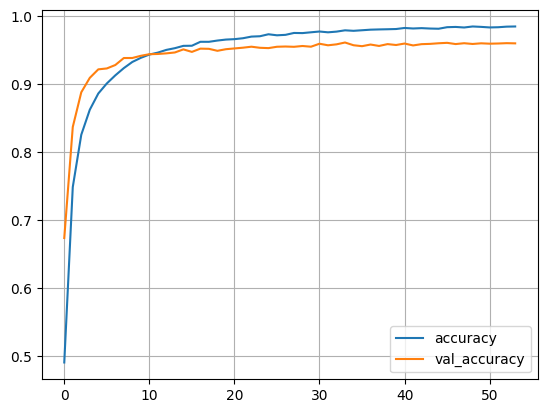

In [69]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'],label='accuracy')
plt.plot(model_history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()

In [128]:
model.predict(X_test)

575/575 [==============================] - 2s 2ms/step


array([[2.0122675e-27, 6.5316249e-22, 1.0886639e-19, ..., 4.1601601e-20,
        2.7615960e-21, 7.0603840e-20],
       [1.6461517e-08, 1.7104181e-08, 5.4740218e-10, ..., 3.3787095e-11,
        1.8835230e-17, 1.8304489e-08],
       [1.7693208e-03, 3.8103310e-05, 1.4896366e-08, ..., 1.7764842e-07,
        4.4503388e-08, 1.4178356e-05],
       ...,
       [2.4016439e-27, 5.5921537e-27, 1.1013945e-29, ..., 1.0578599e-22,
        2.5078908e-28, 1.1166849e-27],
       [3.3134655e-09, 1.2591106e-14, 3.0138329e-13, ..., 3.7640556e-13,
        5.1819697e-14, 8.0510672e-16],
       [1.5832342e-08, 2.5615664e-05, 1.1983075e-13, ..., 6.0108494e-20,
        5.2183764e-19, 3.5021177e-18]], dtype=float32)

In [70]:
from PIL import Image
img=Image.open('ka_1.png').convert('L')

In [71]:
img_array=np.array(img).flatten()/255

In [72]:
x=model.predict(img_array.reshape(1,1024))
x=x.ravel()

1/1 [==============================] - 0s 411ms/step


In [74]:
nepali_dict={
    0: 'क', 1: 'ख', 2: 'ग', 3: 'घ', 4: 'ङ', 5: 'च', 6: 'छ', 7: 'ज', 8: 'झ', 9: 'ञ',
    10: 'ट', 11: 'ठ', 12: 'ड', 13: 'ढ', 14: 'ण', 15: 'त', 16: 'थ', 17: 'द', 18: 'ध', 19: 'न',
    20: 'प', 21: 'फ', 22: 'ब', 23: 'भ', 24: 'म', 25: 'य', 26: 'र', 27: 'ल', 28: 'व', 29: 'श',
    30: 'ष', 31: 'स', 32: 'ह', 33: 'क्ष', 34: 'त्र', 35: 'ज्ञ'
}


In [75]:
print("the enterd string is :",nepali_dict[np.argmax(x)])

the enterd string is : क


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


450/450 [==============================] - 1s 3ms/step
0.9909027777777778
[[383   0   0 ...   0   0   0]
 [  0 379   0 ...   0   0   0]
 [  0   0 390 ...   0   0   0]
 ...
 [  0   0   0 ... 370   1   0]
 [  0   0   0 ...   0 400   0]
 [  0   0   0 ...   0   0 397]]


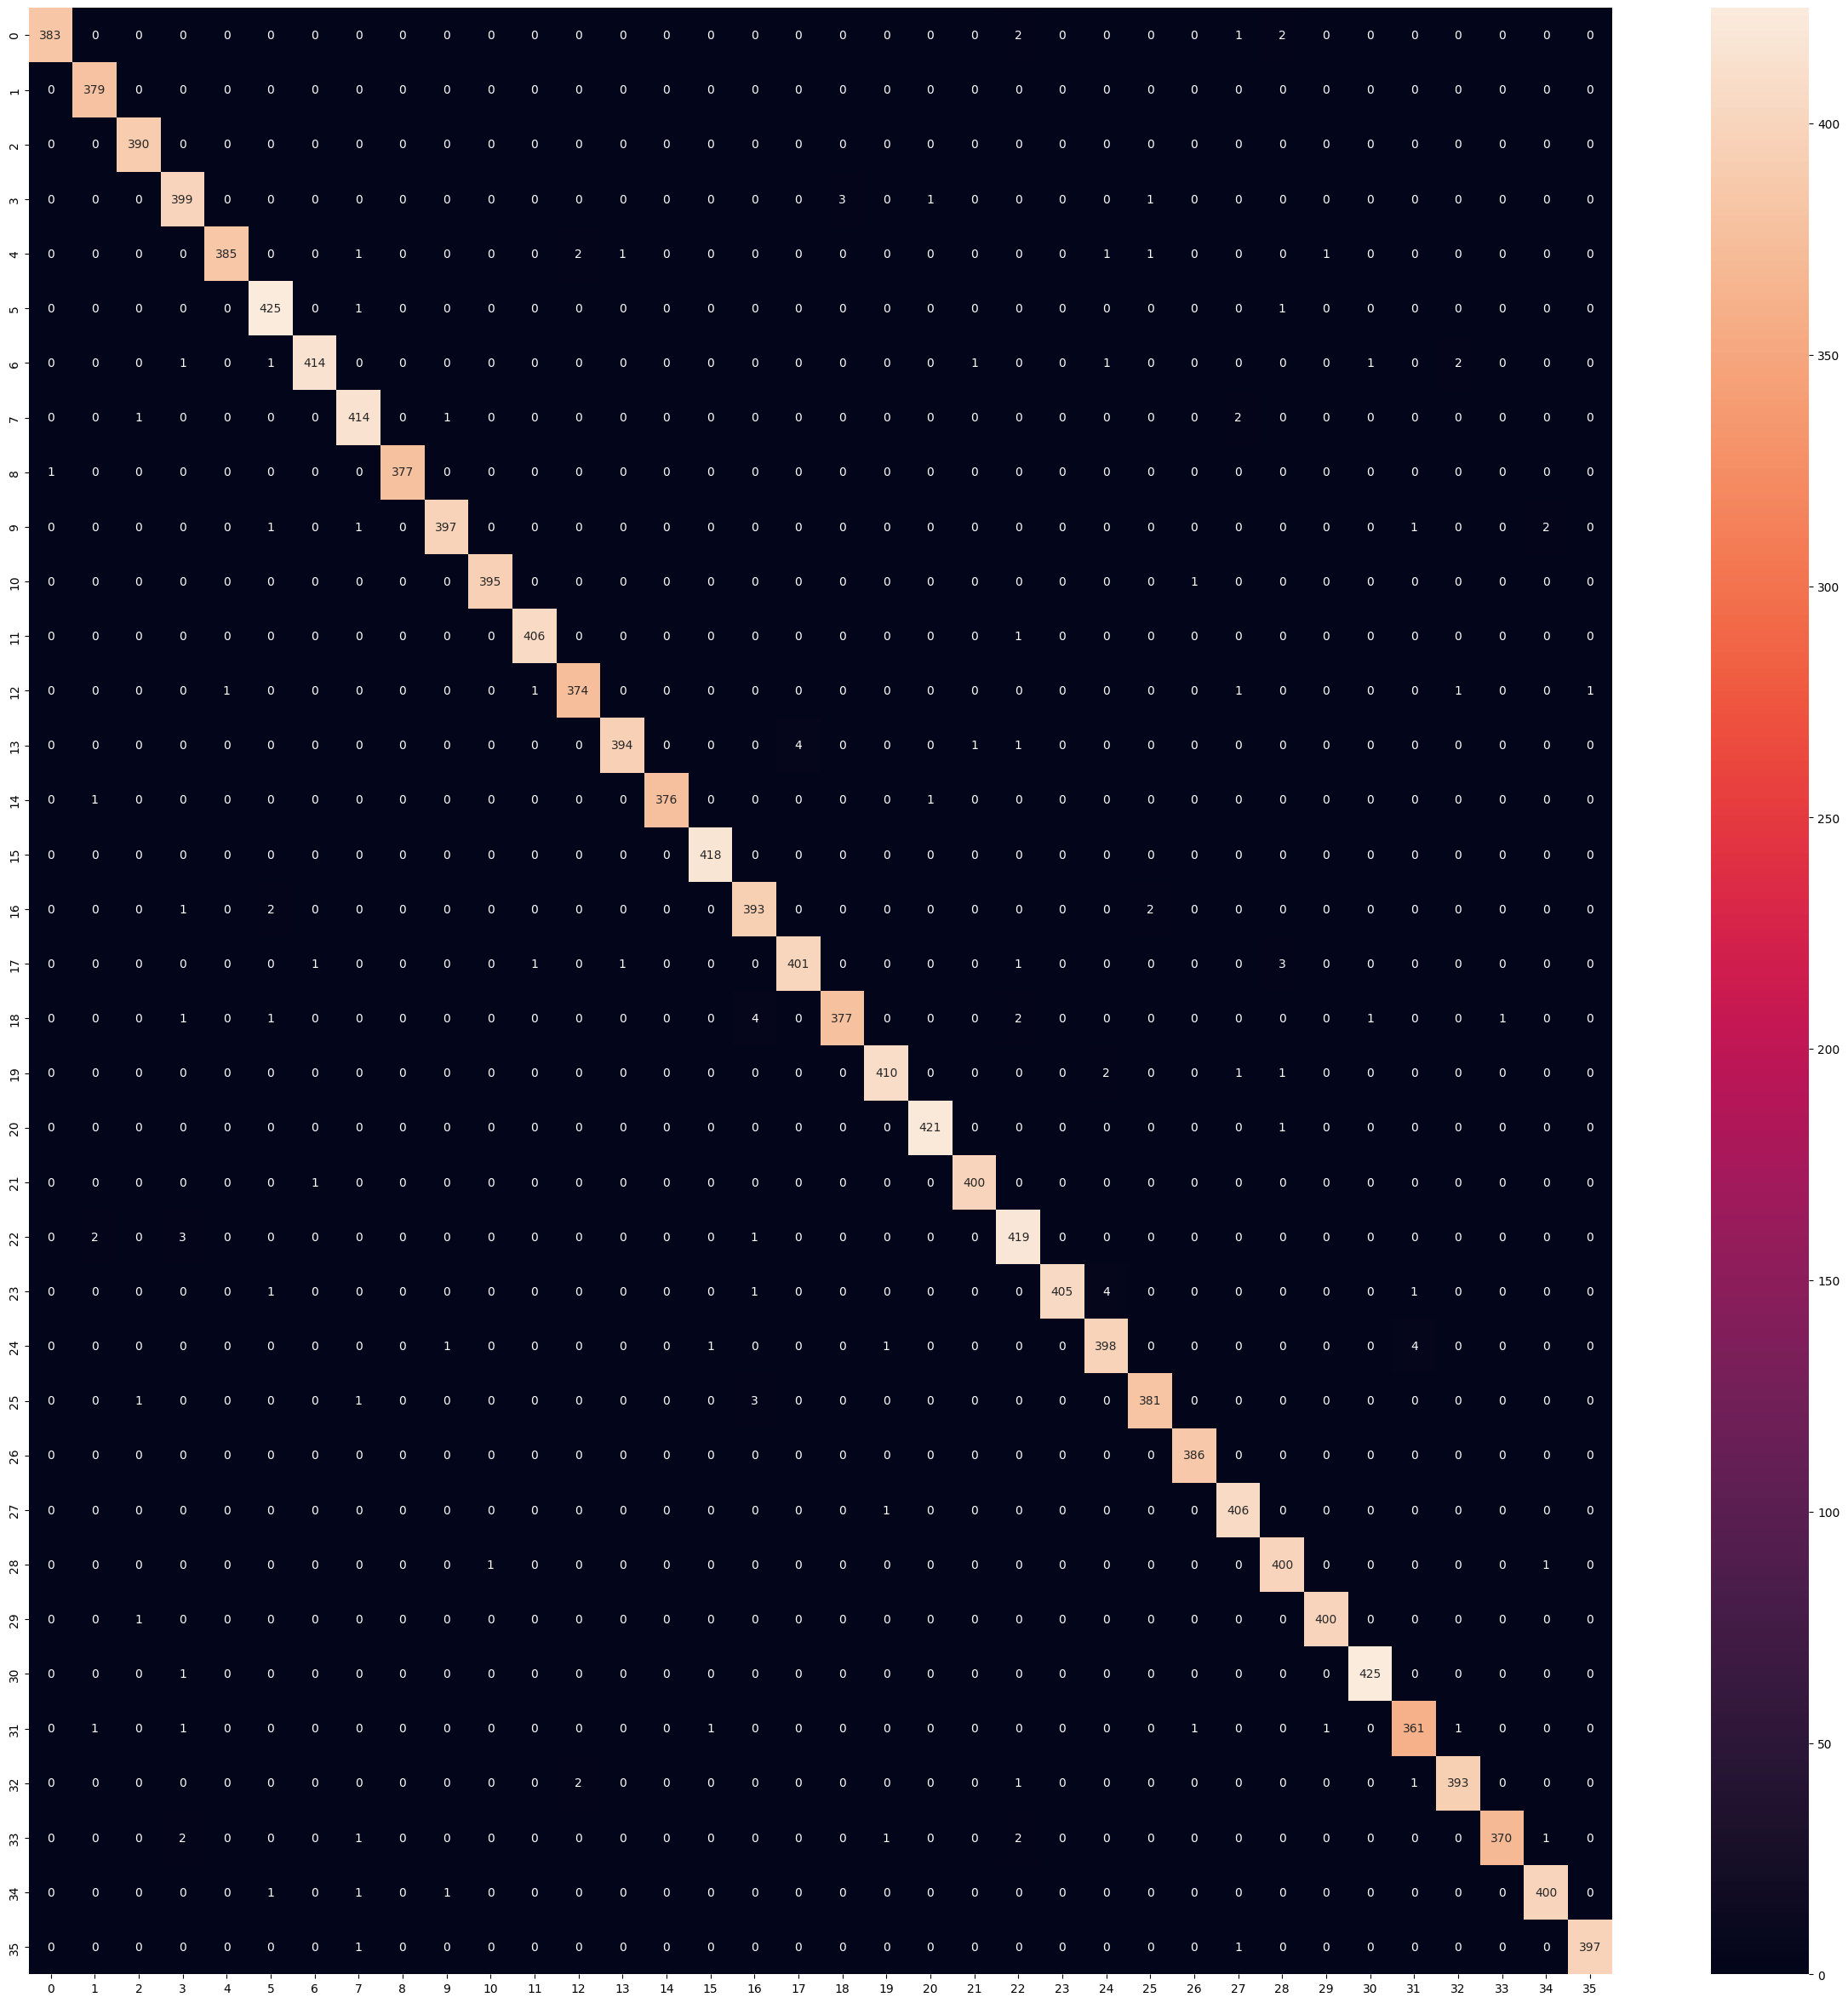

In [93]:
#drawing confusion matrix
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

In [77]:
from tensorflow.keras.models import load_model,save_model
save_model(model,'for_character a=98 v=96.h5')